In [17]:
from tensorflow import keras
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

TypeError: Invalid shape (784,) for image data

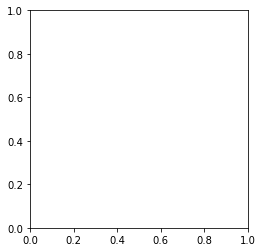

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_train[0]

plt.imshow(some_digit, cmap = "binary")
plt.axis("off")
plt.show()
y_train[1]

In [3]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000, 784))

some_digit = X_train[0]

sgd_clf = SGDClassifier(random_state = 42)

sgd_clf.fit(X_train, y_train_5)

pred = sgd_clf.predict([some_digit])
pred

array([ True])

In [4]:
# Performance Measures
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")
cvs

array([0.95035, 0.96035, 0.9604 ])

In [5]:
from sklearn.base import BaseEstimator

# 90% right cause about 10% of images are 5s
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.91125, 0.90855, 0.90915])

In [6]:
# Confusion matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [7]:
# Precision and recall
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred) # % of when our model is correct
recall = recall_score(y_train_5, y_train_pred) # % detection
precision, recall

(0.8370879772350012, 0.6511713705958311)

In [8]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [9]:
# Decision threshold - decision function on model
y_scores = sgd_clf.decision_function([some_digit])
y_scores
threshold = 0
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([ True])

In [10]:
# raising threshold decreases recall, image represents 5 and classifier detects it when the threshold = 0 but misses when threshold = 8000
threshold = 8000
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

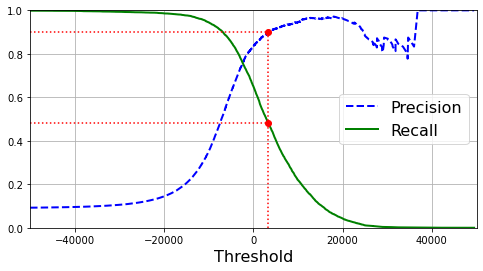

In [11]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown
    
    
recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()


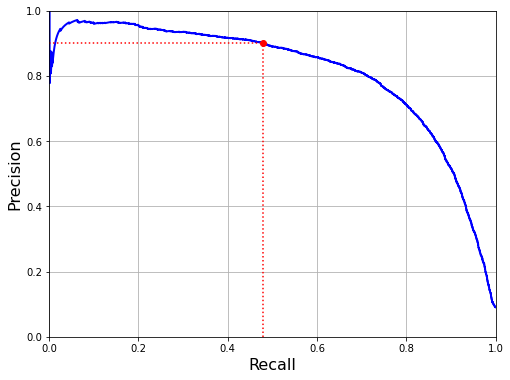

In [12]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

(3908,)


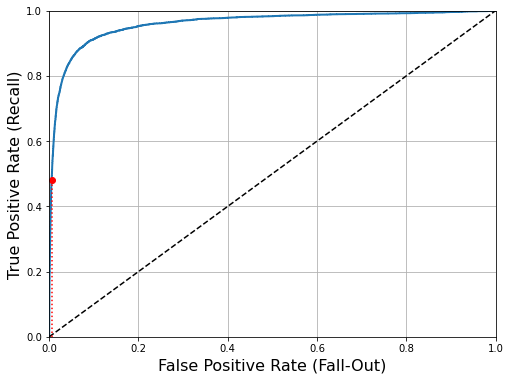

In [13]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
print(fpr.shape)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)    
    
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
# save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [14]:
# AUC, perfect = 1, random 0.5

from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [15]:
# Compare results from SGDClassifier to RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
# plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
# plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
# plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
# plt.plot([fpr_90], [recall_90_precision], "ro")
# plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
# plt.plot([fpr_90], [recall_for_forest], "ro")
# plt.grid(True)
# plt.legend(loc="lower right", fontsize=16)
# # save_fig("roc_curve_comparison_plot")
# plt.show()

In [16]:
roc_auc_score(y_train_5, y_scores_forest)
# RandomForestClassifier much better, curve is closer to top-left corner

0.9983436731328145

In [17]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest), recall_score(y_train_5, y_train_pred_forest)


(0.9905083315756169, 0.8662608374838591)

In [18]:
# Multiclass classification
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_5
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [19]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores, np.argmax(some_digit_scores)

(array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
          9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]]),
 5)

In [20]:
# Scalling inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_train_scaled


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
# Error analysis - when promising model was found
# 1. Look at confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

NameError: name 'save_fig' is not defined

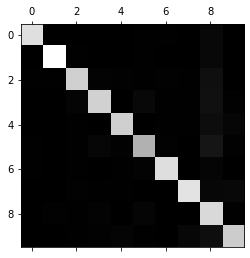

In [22]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsClassifier

some_digit = X_train[0]

y_train_large = y_train >= 7
y_train_odd = y_train % 2 == 1
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier(verbose = True)
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

TypeError: __init__() got an unexpected keyword argument 'verbose'

In [23]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

# f1 score again on multilabel knn
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro") # 0.976410265560605

0.976410265560605

In [41]:
# Multioutput Classification
# system that removes noise from images
# input - a noisy digit image
# output - clean digit image, represented as an array of pixel intensities, output is multilabel -> one label per pixel, each lable can have multiple values(range(0, 255))

noise = np.random.randint(0, 10, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 10, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

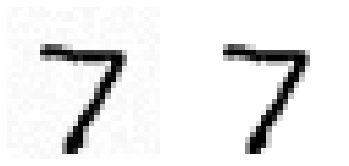

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_index = 0

# with noise
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

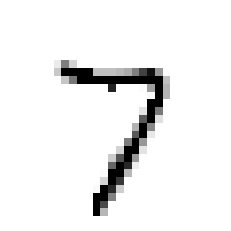

In [52]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

In [53]:
# MNIST 97 % acc
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  12.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  12.3s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  12.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  14.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  13.5s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  12.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  12.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  12.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  13.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  12.7s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  16.3s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)